In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
H = pd.read_csv('soc-redditHyperlinks-title.tsv', sep = '\t').iloc[:,:5]
H['index'] = H.index
H['date'] = H['TIMESTAMP'].str[:4]
H.drop("TIMESTAMP", axis=1, inplace=True)
H = H.query("date == '2016'").iloc[:1000,:]
H.head(1)

SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID  LINK_SENTIMENT  index  date
176      karmamartyr             dayz  1u74wws               1    176  2016

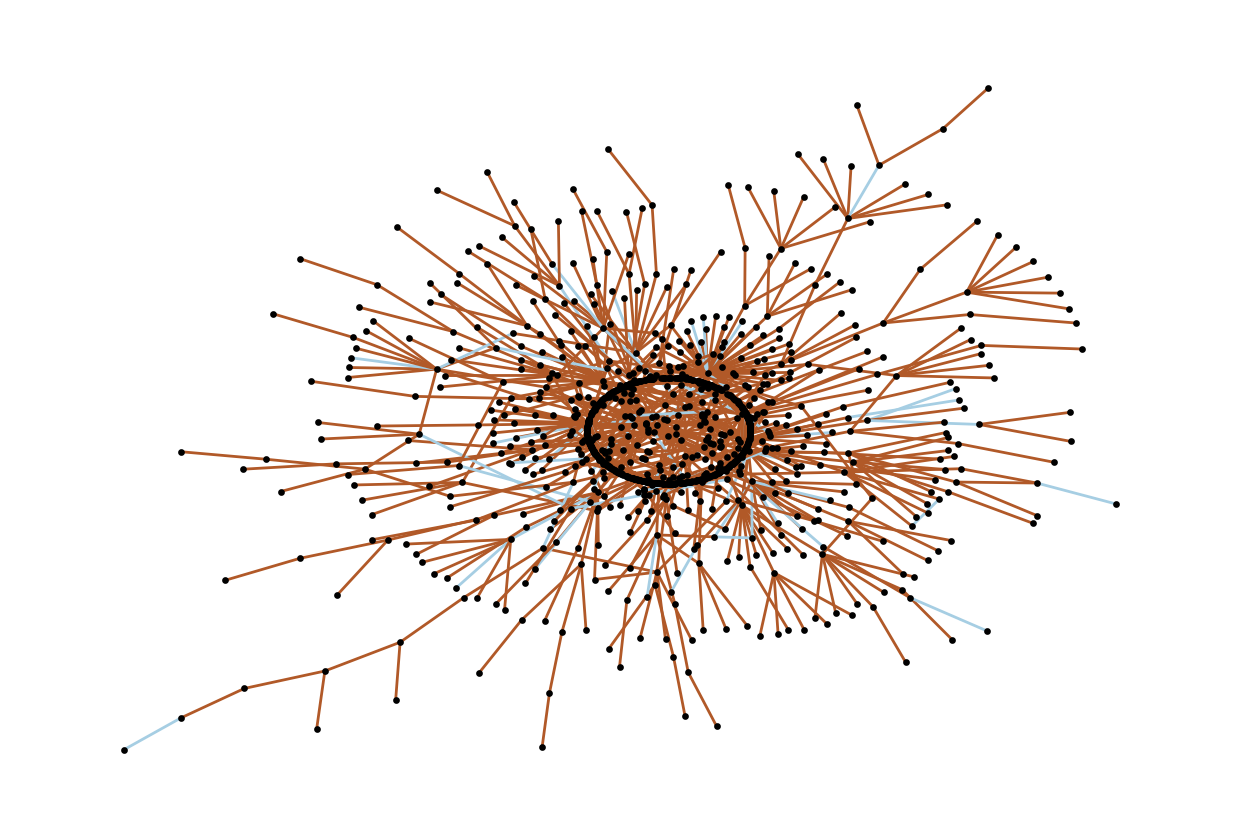

In [14]:
I = nx.from_pandas_edgelist(H, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', ['LINK_SENTIMENT'])
colors = nx.get_edge_attributes(I,'LINK_SENTIMENT').values()

fig = plt.figure(1, dpi=200)
nx.draw_kamada_kawai(I,
        edge_color=colors,
        node_color='black',
        node_size = 2,
        edge_cmap=plt.cm.Paired)

The number of nodes is 1106
The number of edges is 910
Which is the maximum degree? 55


AttributeError: 'FacetGrid' object has no attribute 'set_dpi'

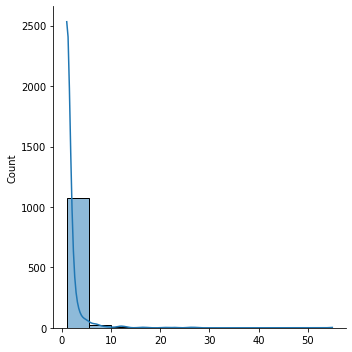

In [35]:
print('The number of nodes is '+str(I.number_of_nodes()))
print('The number of edges is '+str(I.number_of_edges()))

degrees = [I.degree(n) for n in I.nodes()]
print('Which is the maximum degree? '+str(max(degrees)))
j = sns.displot(x=degrees, kde = True, palette = 'Paired')
print('As expected, the degree distribution follows a power-law distribution:')

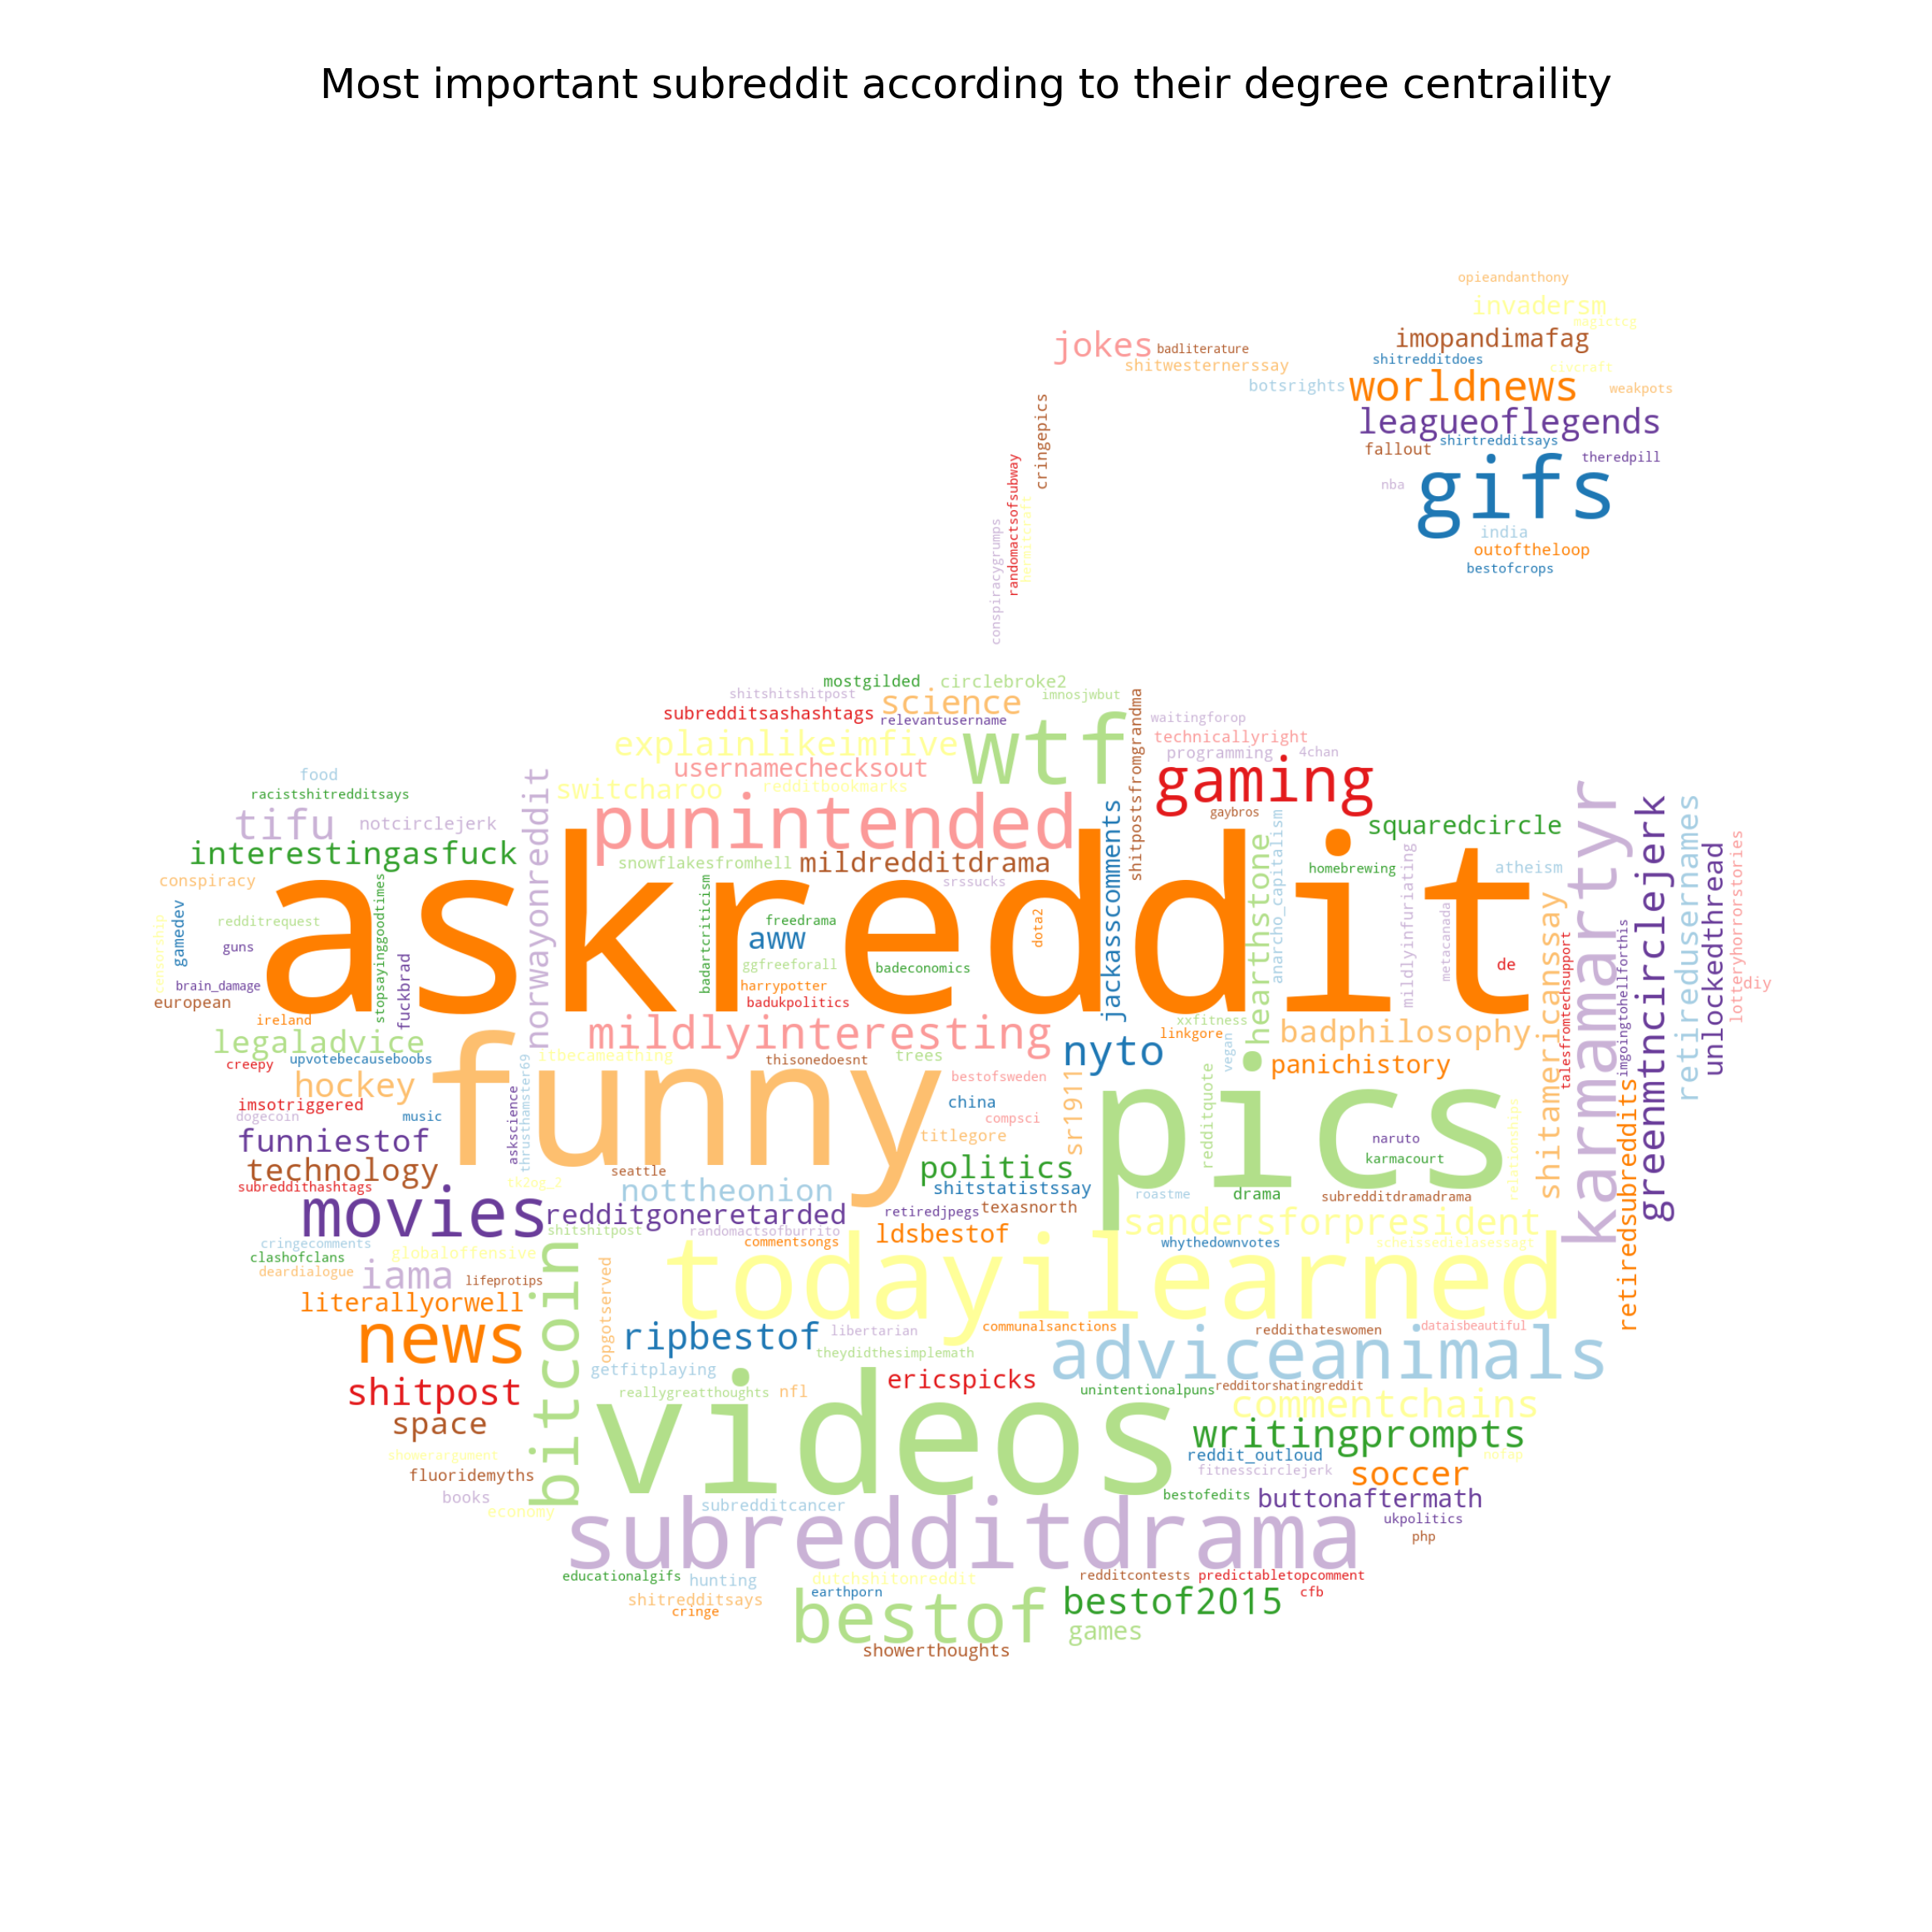

In [29]:
deg_cen_I = nx.degree_centrality(I)
sorted_deg_cen_I = sorted(deg_cen_I.items(), key=lambda x:x[1], reverse = True)
diction = dict(sorted_deg_cen_I)
diction = pd.DataFrame.from_dict(diction, orient = 'index')
diction.rename(columns = {0: 'Degree Centrality'}, inplace = True)

fig = px.bar(diction.iloc[:10,:],
             x=diction.index[:10],
             y='Degree Centrality')

fig.update_layout(xaxis_title = None,
                  xaxis_tickangle=-45,
                  title = 'First 10 reddits based on Degree Centrality')
fig.show()

reddit_mask = np.array(Image.open("logo-reddit-logo-icon-png-svg.png"))
data = diction.set_index(diction.index).to_dict()['Degree Centrality']

wc = WordCloud(width=1000,
               height=1000,
               max_words=200,
               colormap = 'Paired',
               background_color = 'white',
               random_state = 42,
               mask=reddit_mask).generate_from_frequencies(data)

plt.figure(figsize=(10, 10), dpi = 300)
plt.title("Most important subreddit according to their degree centraility", y = 0.95)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
print('Is the graph connected? '+ str(nx.is_connected(I)))
print('Is the graph biconnected? '+ str(nx.is_biconnected(I)))

Is the graph connected? False
Is the graph biconnected? False


How many articulation points? 204


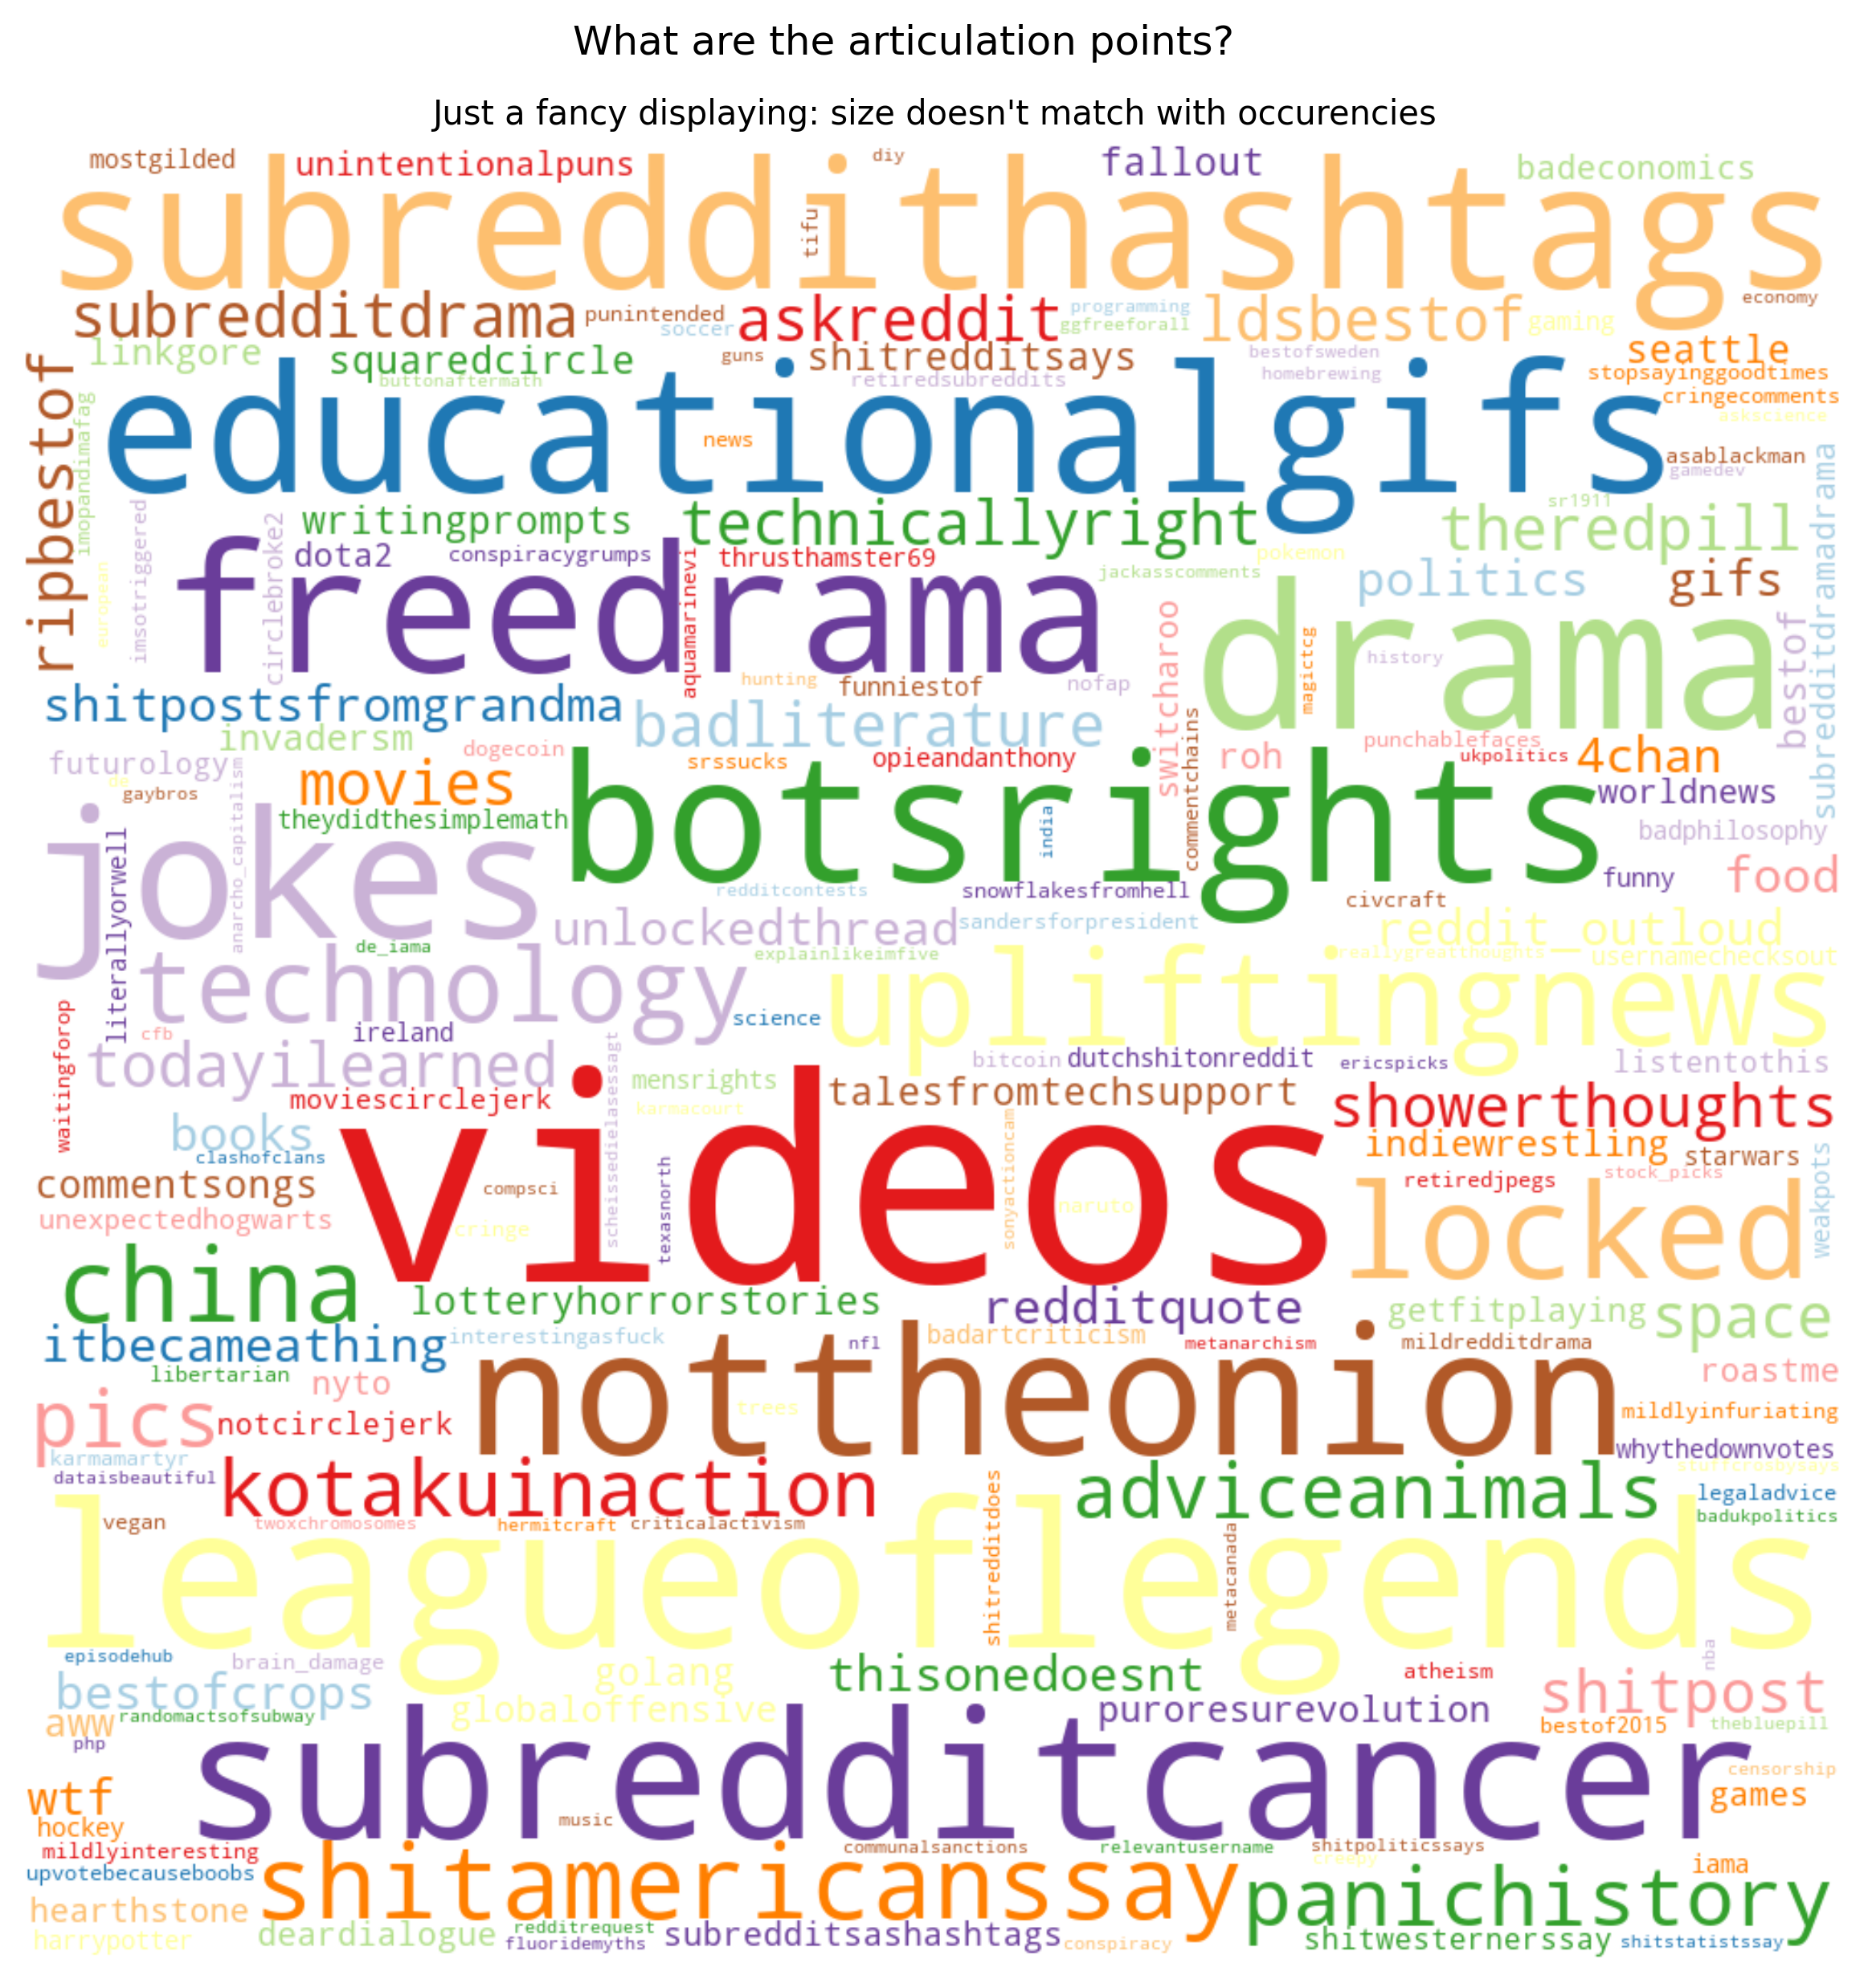

In [26]:
print('How many articulation points? ' + str(len(list(nx.articulation_points(I)))))

x = pd.DataFrame(list(nx.articulation_points(I)))
x['value'] = 1
data = x.set_index(0).to_dict()['value']
wc = WordCloud(width=1000,
               height=1000,
               max_words=200,
               colormap = 'Paired',
               background_color = 'white').generate_from_frequencies(data)

plt.figure(figsize=(10, 10), dpi = 300)
plt.suptitle('What are the articulation points?', y = 0.93)
plt.title("Just a fancy displaying: size doesn't match with occurencies", size = 10)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
bet_cen = nx.betweenness_centrality(I)
bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse = True)
bet_cen = dict(bet_cen)
bet_cen = pd.DataFrame.from_dict(bet_cen, orient = 'index')
bet_cen.rename(columns = {0: 'Betweenness Centrality'}, inplace = True)

fig2 = px.bar(bet_cen.iloc[:10,:],
             x=bet_cen.index[:10],
             y='Betweenness Centrality')

fig2.update_layout(xaxis_title = None,
                   xaxis_tickangle=-45,
                   title = 'First 10 reddits based on Betweenness Centrality')
fig2.show()